# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

## 24시간

In [86]:
def get_train_test_24( ):
    
    train = pd.read_csv('../data/plant_train_final.csv')
    test = pd.read_csv('../data/plant_test.csv')
    
    X_train = train.iloc[:, 1:8]
    X_test = test.iloc[:, 1:8]
    y_train = train.iloc[:, 10]
    y_test = test.iloc[:, 9]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_24()

# def get_train_test_24( ):
    
#     train = pd.read_csv('../data/plant_train_final.csv')
    
# #     train['MEA_DDHR'] = pd.to_datetime(train['MEA_DDHR'])
    
#     data = train.iloc[:, 1:8]
#     target = train.iloc[:, 10]
    
#     X_train, X_test, y_train, y_test = train_test_split(data, target, 
#                                                     test_size=0.2 , random_state= 156)

#     return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = get_train_test_24()

In [87]:
X_train.head()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1
0,1,1,16.0,24.0,10.0,13.0,32.0
1,1,2,11.0,14.0,9.0,13.0,32.0
2,1,3,23.0,11.0,42.0,13.0,32.0
3,1,1,16.0,28.0,9.0,14.0,30.0
4,1,2,10.0,15.0,18.0,14.0,30.0


In [88]:
def get_prediction():
    
    rf_clf = RandomForestClassifier(random_state=0)
    rf_clf.fit(X_train , y_train)
    pred = rf_clf.predict(X_test)
    
    return pred

In [89]:
pred_24 = get_prediction()

In [90]:
pred_sr = pd.Series(pred_24)

In [91]:
pred_sr.value_counts()

0.0    3538
1.0       1
dtype: int64

In [84]:
accuracy = accuracy_score(y_test , pred_24)
print("정확도: ", accuracy)

정확도:  0.9962459880788629


In [97]:
# pred_24_prob = rf_clf.predict_proba(X_test)
# pred_24_prob

## 48시간

In [92]:
def get_train_test_48( ):
    
    train = pd.read_csv('../data/plant_train_final.csv')
    test = pd.read_csv('../data/plant_test.csv')
    
    X_train = train.iloc[:, 1:8]
    X_test = test.iloc[:, 1:8]
    y_train = train.iloc[:, 12]
    y_test = test.iloc[:, 11]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_48()

In [93]:
pred_48 = get_prediction()

In [94]:
pred_sr_48 = pd.Series(pred)
pred_sr_48.value_counts()

0.0    3539
dtype: int64

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# X_train.columns.values
# rf_clf = pd.DataFrame(data=np.c_[X_train.columns.values,rf_clf.feature_importances_],columns=["variable", "importance"])
# rf_clf.sort_values(by="importance", ascending=False, inplace=True)
# plt.figure(figsize=(30, 12))
# plt.bar(rf_clf.variable, rf_clf.cum_sum)
# plt.xticks(rotation=90, fontproperties=font_prop)
# plt.show()

# validation

In [63]:
val = pd.read_csv('../data/validation.csv')
val.head()

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 0:00,2,3,2019-04-02 0:00,NaN,NaN,2019-04-03 0:00,NaN,NaN
1,2019-04-01 4:30,1,2,2019-04-02 4:30,NaN,NaN,2019-04-03 4:30,NaN,NaN
2,2019-04-01 10:30,2,3,2019-04-02 10:30,NaN,NaN,2019-04-03 10:30,NaN,NaN
3,2019-04-01 11:00,1,1,2019-04-02 11:00,NaN,NaN,2019-04-03 11:00,NaN,NaN
4,2019-04-01 13:30,2,1,2019-04-02 13:30,NaN,NaN,2019-04-03 13:30,NaN,NaN


In [74]:
val['X24H_COND_LOC'] = pred_24
val.head()

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 0:00,2,3,2019-04-02 0:00,0.0,NaN,2019-04-03 0:00,NaN,NaN
1,2019-04-01 4:30,1,2,2019-04-02 4:30,0.0,NaN,2019-04-03 4:30,NaN,NaN
2,2019-04-01 10:30,2,3,2019-04-02 10:30,0.0,NaN,2019-04-03 10:30,NaN,NaN
3,2019-04-01 11:00,1,1,2019-04-02 11:00,0.0,NaN,2019-04-03 11:00,NaN,NaN
4,2019-04-01 13:30,2,1,2019-04-02 13:30,0.0,NaN,2019-04-03 13:30,NaN,NaN


In [75]:
val['X48H_COND_LOC'] = pred_48
val.head()

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 0:00,2,3,2019-04-02 0:00,0.0,NaN,2019-04-03 0:00,0.0,NaN
1,2019-04-01 4:30,1,2,2019-04-02 4:30,0.0,NaN,2019-04-03 4:30,0.0,NaN
2,2019-04-01 10:30,2,3,2019-04-02 10:30,0.0,NaN,2019-04-03 10:30,0.0,NaN
3,2019-04-01 11:00,1,1,2019-04-02 11:00,0.0,NaN,2019-04-03 11:00,0.0,NaN
4,2019-04-01 13:30,2,1,2019-04-02 13:30,0.0,NaN,2019-04-03 13:30,0.0,NaN


In [1]:
import pandas as pd
plant = pd.read_csv('../data/plant_train_final.csv')
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND,X24_TMA,X24H_COND_LOC,X48_TMA,X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,10.0,13.0,32.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
1,2016-04-01 00:00:00,1,2,11.0,14.0,9.0,13.0,32.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
2,2016-04-01 00:00:00,1,3,23.0,11.0,42.0,13.0,32.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
3,2016-04-01 12:00:00,1,1,16.0,28.0,9.0,14.0,30.0,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0
4,2016-04-01 12:00:00,1,2,10.0,15.0,18.0,14.0,30.0,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0


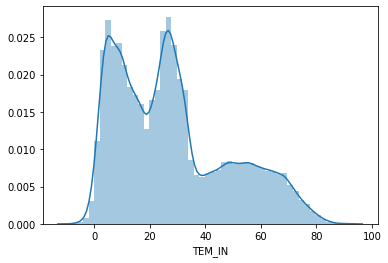

In [8]:
import seaborn as sns
sns.distplot(plant["TEM_IN"])